In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from matplotlib.lines import Line2D
from cosmo import CosmoCalc
import sims
import tools
import lensing
import foregrounds as fg
import experiments as exp

## Generating CMB Temperature Anisotropy Maps

In [2]:
nber_maps = 1
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cmb_map = sims.cmb_mock_data(map_params, l, cl)

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


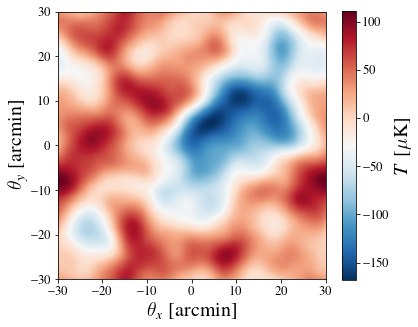

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
_, extent = tools.make_grid(map_params)
sz = 20

im = ax.imshow(cmb_map, extent = extent, cmap = cm.RdBu_r)
cb = fig.colorbar(im, shrink = 0.825)
cb.set_label(label=r'$T \ [\mu$'+'K]', size=sz)
cb.ax.tick_params(labelsize=sz-7)
ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
ax.tick_params(labelsize = sz-7)

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cmb_temperature_anisotropy_map.eps', bbox_inches = 'tight')

In [4]:
map_params = [240, 0.25, 240, 0.25]
kappa_map = lensing.NFW(6e14, 3, 1, 1100).convergence_map(map_params)
alpha_vec = lensing.deflection_from_convergence(map_params, kappa_map)
alphaX, alphaY = alpha_vec
alpha_map = np.hypot(alphaX, alphaY)

/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


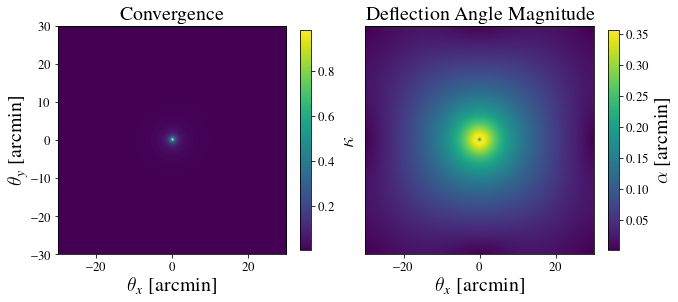

In [5]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9.2,9.2))
sz = 20

im0 = axarr[0].imshow(kappa_map, extent = extent)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.333)
cb0.set_label(label = r'$\kappa$', size=sz)
cb0.ax.tick_params(labelsize=sz-7)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_title('Convergence', fontsize = sz)
axarr[0].tick_params(labelsize = sz-7)

im1 = axarr[1].imshow(alpha_map, extent = extent)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.333)
cb1.set_label(label = r'$\alpha \ $' + '[arcmin]', size=sz)
cb1.ax.tick_params(labelsize=sz-7)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_title('Deflection Angle Magnitude', fontsize = sz)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz-7)

fig.tight_layout(pad=0)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/convergence_deflection_map.eps', bbox_inches = 'tight')

## kSZ and tSZ Cutout

In [6]:
map_params = [40, 0.25, 40, 0.25]
fname = '/Volumes/Extreme_SSD/codes/master_thesis/code/data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize20.0am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
scale_fac = fg.compton_y_to_delta_Tcmb(145, uK = True)
tsz_cutouts, ksz_cutouts = [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutouts.append(cutouts[keyname]['y']*scale_fac)
    ksz_cutouts.append(cutouts[keyname]['ksz']*random.randrange(-1, 2, 2))
tsz_cutout = tsz_cutouts[1]
ksz_cutout = ksz_cutouts[1]

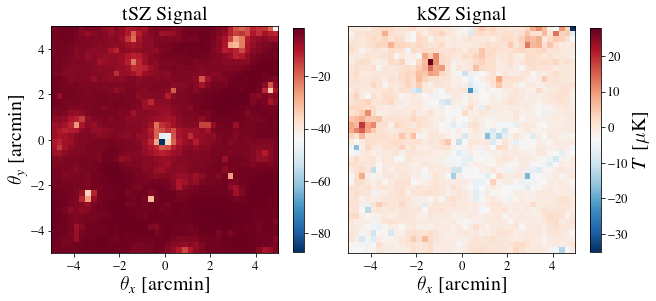

In [7]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9,9))
sz = 20

im0 = axarr[0].imshow(tsz_cutout, extent = extent, cmap = cm.RdBu_r)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.345)
cb0.ax.tick_params(labelsize=sz-7)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_title('tSZ Signal', fontsize = sz)
axarr[0].tick_params(labelsize = sz-7)

im1 = axarr[1].imshow(ksz_cutout, extent = extent, cmap = cm.RdBu_r)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.345)
cb1.set_label(label=r'$T \ [\mu$'+'K]', size=sz)
cb1.ax.tick_params(labelsize=sz-7)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_title('kSZ Signal', fontsize = sz)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz-7)

fig.tight_layout(pad=0)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/tSZ_kSZ_cutout.eps', bbox_inches = 'tight')

## Extragalactic Power Spectra

In [8]:
l, cl = CosmoCalc().cmb_power_spectrum()
l, cl_radio = fg.extragalactic_power_spectrum(150, components = ['radio'])
l, cl_cib = fg.extragalactic_power_spectrum(150, components = ['cib'])
l, cl_tsz = fg.extragalactic_power_spectrum(150, components = ['tsz'])
l, cl_ksz = fg.extragalactic_power_spectrum(150, components = ['ksz'])
l, cl_tsz_cib = fg.extragalactic_power_spectrum(150, components = ['tsz_cib'])
l, cl_fg_total = fg.extragalactic_power_spectrum(150, components = 'all')

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:129: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/master_t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


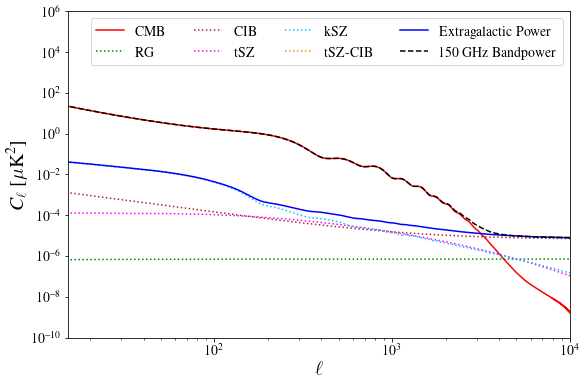

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
sz = 20

ax.plot(l, cl, 'r', label = r'CMB')
ax.plot(l, cl_radio,  color = 'green', label = r'RG', ls = ':')
ax.plot(l, cl_cib, color = 'brown', label = r'CIB', ls = ':')
ax.plot(l, cl_tsz, color = 'magenta', label = r'tSZ', ls = ':')
ax.plot(l, cl_ksz, color = 'deepskyblue', label = r'kSZ', ls = ':')
ax.plot(l, cl_tsz_cib, color = 'darkorange', label = r'tSZ-CIB', ls = ':')
ax.plot(l, cl_fg_total, 'blue', label = r'Extragalactic Power')
ax.plot(l, cl_fg_total+cl, 'black', label = r'150 GHz Bandpower', ls = '--')
ax.tick_params(labelsize = sz-6)
ax.set_xlim(15, 10000) 
ax.set_ylim(1e-10, 1e6)
ax.set_xlabel(r'$\ell$', fontsize = sz)
ax.set_ylabel(r'$C_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol = 4, prop={'size': sz-6}) 

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/extragalactic_power_spectra.eps', bbox_inches = 'tight')

## Experimental Specifications

In [10]:
specs_dic, corr_noise_bands, rho = exp.specs('s4wide')
freq_arr = sorted( specs_dic.keys() )
beam_fwhm_arr, whitenoise_arr, rednoise_arr, elknee_arr, alphaknee_arr = [], [], [], [], []
for freq in freq_arr:
    beam_fwhm, noiseval_white, noiseval_red, elknee, alphaknee = specs_dic[freq]
    beam_fwhm_arr.append(beam_fwhm)
    whitenoise_arr.append(noiseval_white)
    rednoise_arr.append(noiseval_red)
    elknee_arr.append(elknee)
    alphaknee_arr.append(alphaknee) 


beam_arr = []
for i in range(len(beam_fwhm_arr)):
    l, bl = exp.beam_power_spectrum(beam_fwhm_arr[i])
    beam_arr.append(np.sqrt(bl))     
    
noise_power_white_arr = []
for i in range(len(whitenoise_arr)):
    l, nl = exp.white_noise_power_spectrum(whitenoise_arr[i])
    noise_power_white_arr.append(nl)    
    
noise_power_red_arr = []
for i in range(len(rednoise_arr)):
    l, nl = exp.red_noise_power_spectrum(rednoise_arr[i], elknee_arr[i], alphaknee_arr[i])
    noise_power_red_arr.append(nl)
    
l, nl_dict = exp.noise_power_spectra_dic(experiment = 's4wide', deconvolve = False, use_cross_power = False)
noise_power_arr = []
for freq in freq_arr:
    noise_power_arr.append(nl_dict[freq])

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:133: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:140: RuntimeWarning: divide by zero encountered in power
  nl_red2= n_red2*(l/elknee2)**alphaknee2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


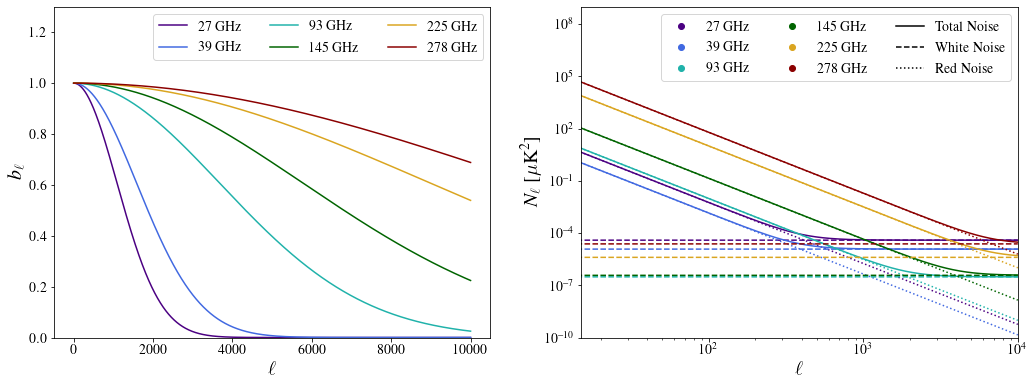

In [11]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))
sz = 20

color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']

for i in range(len(freq_arr)):
    axarr[0].plot(l, beam_arr[i],  color = color_arr[i], label = str(freq_arr[i])+' GHz')
axarr[0].set_xlabel(r'$\ell$', fontsize = sz)
axarr[0].set_ylabel(r'$b_{\ell}$', fontsize = sz)
axarr[0].set_ylim(0,1.3)
axarr[0].tick_params(labelsize = sz-6)
axarr[0].legend(ncol = 3, prop={'size': sz-6}) 

for i in range(len(freq_arr)):
    axarr[1].plot(l, noise_power_arr[i],  color = color_arr[i], ls = '-')
    axarr[1].plot(l, noise_power_white_arr[i],  color = color_arr[i], ls = '--')
    axarr[1].plot(l, noise_power_red_arr[i],  color = color_arr[i], ls = ':')

axarr[1].set_ylabel(r'$N_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz)
axarr[1].tick_params(labelsize = sz-6)
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlim(15, 10000) 
axarr[1].set_ylim(1e-10, 1e9)
axarr[1].set_xlabel(r'$\ell$', fontsize = sz)
patches = [Line2D([0], [0], color = c, marker='o', ls = '') for c in color_arr]
patches+= [Line2D([0], [0], color='black',linestyle='-')]
patches+= [Line2D([0], [0], color='black',linestyle='--')]
patches+= [Line2D([0], [0], color='black',linestyle=':')]
labels = [str(freq_arr[0])+' GHz', str(freq_arr[1])+' GHz', str(freq_arr[2])+' GHz', str(freq_arr[3])+' GHz',
          str(freq_arr[4])+' GHz', str(freq_arr[5])+' GHz','Total Noise', 'White Noise', 'Red Noise']
axarr[1].legend(patches, labels, ncol = 3, prop={'size': sz-6})

fig.tight_layout(pad=3)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/beam_and_noise.eps', bbox_inches = 'tight')